---
# Tkinterにmatplotlibグラフを埋め込む
https://qiita.com/kotai2003/items/45953b4d037a62b2042c
### Draw graph using matplotlib

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


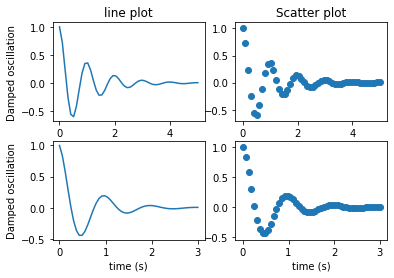

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Prepare Data
x1 = np.linspace(0.0, 5.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
x2 = np.linspace(0.0, 3.0)
y2 = np.cos(2 * np.pi * x2) * np.exp(-x1)


# Figure instance
fig = plt.figure()
print(type(fig))

#ax1 instance
ax1 = fig.add_subplot(221)
ax1.plot(x1, y1)
ax1.set_title('line plot')
ax1.set_ylabel('Damped oscillation')
print(type(ax1))

#ax2 instance
ax2 = fig.add_subplot(222)
ax2.scatter(x1, y1, marker='o')
ax2.set_title('Scatter plot')

#ax3 instance
ax3 = fig.add_subplot(223)
ax3.plot(x2,y2)
ax3.set_ylabel('Damped oscillation')
ax3.set_xlabel('time (s)')

#ax4 instance
ax4 = fig.add_subplot(224)
ax4.scatter(x2, y2, marker='o')
ax4.set_xlabel('time (s)')

#Drawing
plt.show()

### Draw graph on Tkinter

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk

# Prepare Data
x1 = np.linspace(0.0, 5.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
x2 = np.linspace(0.0, 3.0)
y2 = np.cos(2 * np.pi * x2) * np.exp(-x1)

# Figure instance
fig = plt.Figure()

# ax1
ax1 = fig.add_subplot(221)
ax1.plot(x1, y1)
ax1.set_title('line plot')
ax1.set_ylabel('Damped oscillation')

# ax2
ax2 = fig.add_subplot(222)
ax2.scatter(x1, y1, marker='o')
ax2.set_title('Scatter plot')

# ax3
ax3 = fig.add_subplot(223)
ax3.plot(x2, y2)
ax3.set_ylabel('Damped oscillation')
ax3.set_xlabel('time (s)')

# ax4
ax4 = fig.add_subplot(224)
ax4.scatter(x2, y2, marker='o')
ax4.set_xlabel('time (s)')


# When windows is closed.

def _destroyWindow():
    root.quit()
    root.destroy()


# Tkinter Class

root = tk.Tk()
root.withdraw()
root.protocol('WM_DELETE_WINDOW', _destroyWindow)  # When you close the tkinter window.

# Canvas
canvas = FigureCanvasTkAgg(fig, master=root)  # Generate canvas instance, Embedding fig in root
canvas.draw()
canvas.get_tk_widget().pack()
#canvas._tkcanvas.pack()

# root
root.update()
root.deiconify()
root.mainloop()

---
# PythonでPandasのPlot機能を使えばデータ加工からグラフ作成までマジでシームレス
https://qiita.com/hik0107/items/de5785f680096df93efa

---
# matlab data file to pandas DataFrame [duplicate]
https://stackoverflow.com/questions/38197449/matlab-data-file-to-pandas-dataframe

In [3]:
import numpy as np
import scipy.io
import hdf5storage

mat_path = r'W:\wataru\Recording_Analysis\Bases_dmPFC-BLA\2017-12-19_vm81a_base\RIG01_171219_140419_gamma.mat'
gamma = hdf5storage.loadmat(mat_path)['gamma']
# gamma = hdf5storage.loadmat(mat_path)

print(gamma.dtype)
print(gamma.dtype.names)

data = np.squeeze(gamma['data'])
timestamps = np.squeeze(gamma['timestamps'])
# gamma.shape

[('timestamps', '<f8', (4500000, 1)), ('data', '<f8', (4500000, 6)), ('amp', '<f8', (4500000, 6)), ('phase', '<f8', (4500000, 6)), ('filterparms', [('passband', '<f8', (1, 2)), ('stopband', '<f8', (0, 0)), ('order', '<f8', (1, 1))], (1,)), ('samplingRate', '<f8', (1, 1))]
('timestamps', 'data', 'amp', 'phase', 'filterparms', 'samplingRate')


In [4]:
data.shape

(4500000, 6)

In [5]:
timestamps.shape

(4500000,)

---
# Pythonでグラフ（Matplotlib）を表示して動的に変更する
https://water2litter.net/rum/post/python_tkinter_matplotlib/

In [6]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.figure import Figure
import numpy as np

class Application(tk.Frame):
    def __init__(self, master=None):
        super().__init__(master)
        self.master = master
        self.master.title('Matplotlib in tkinter')
        self.pack()
        self.create_widgets()
        self.start_up()
        self.draw_plot()

    def create_widgets(self):
        self.canvas_frame = tk.Frame(self.master)
        self.canvas_frame.pack(side=tk.LEFT)
        self.control_frame = tk.Frame(self.master)
        self.control_frame.pack(side=tk.RIGHT)

        self.canvas = FigureCanvasTkAgg(fig, self.canvas_frame)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

        self.toolbar = NavigationToolbar2Tk(self.canvas, self.canvas_frame)
        self.toolbar.update()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

        self.x_v = tk.DoubleVar()
        self.x_scale = tk.Scale(self.control_frame,
            variable=self.x_v,
            from_=0.0,
            to=10.0,
            resolution=0.1,
            orient=tk.HORIZONTAL,
            command=self.draw_plot)
        self.x_scale.pack(anchor=tk.NW)

        self.y_v = tk.DoubleVar()
        self.y_scale = tk.Scale(self.control_frame,
            variable=self.y_v,
            from_=0.0,
            to=10.0,
            resolution=0.1,
            orient=tk.HORIZONTAL,
            command=self.draw_plot)
        self.y_scale.pack(anchor=tk.NW)

    def start_up(self):
        self.x_v.set(1.0)
        self.y_v.set(1.0)

    def draw_plot(self, event=None):
        global h
        v = self.x_v.get()
        w = self.y_v.get()
        t = np.arange(0.0, 6.29, 0.01)
        x = np.cos(v * t)
        y = np.sin(w * t)
        h.set_xdata(x)
        h.set_ydata(y)
        self.canvas.draw()

fig = Figure(figsize=(5, 5), dpi=100)
ax = fig.add_subplot(111)
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
h, = ax.plot([],[], 'green')

root = tk.Tk()
app = Application(master=root)
app.mainloop()

# Repeat random plotting

In [ ]:
import random
import matplotlib.pyplot as pyplot
import time

pyplot.ion()

x = range(10)
y = lambda m: [m*random.random() for i in range(10)]

pLine, = pyplot.plot(x, y(1))

for i in range(10):
    # time.sleep(1)
    pLine.set_ydata(y(i+1))

    ax = pyplot.gca()

    # recompute the ax.dataLim
    ax.relim()
    # update ax.viewLim using the new dataLim
    ax.autoscale_view()
    pyplot.show()
    pyplot.pause(2)

# I don't know what it is

AttributeError: 'FigureCanvasTkAgg' object has no attribute '_tkphoto'

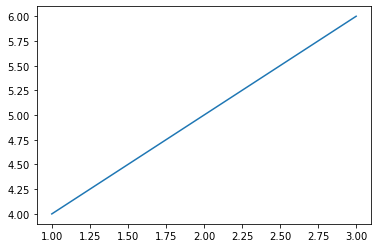

Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\wave_viewer\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\User\anaconda3\envs\wave_viewer\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-8-784f9d763625>", line 16, in PlottingThread
  File "C:\Users\User\anaconda3\envs\wave_viewer\lib\site-packages\matplotlib\backends\_backend_tk.py", line 201, in __init__
    self._tkcanvas = tk.Canvas(
  File "C:\Users\User\anaconda3\envs\wave_viewer\lib\tkinter\__init__.py", line 2683, in __init__
    Widget.__init__(self, master, 'canvas', cnf, kw)
  File "C:\Users\User\anaconda3\envs\wave_viewer\lib\tkinter\__init__.py", line 2567, in __init__
    self.tk.call(
RuntimeError: main thread is not in main loop


In [8]:
import tkinter
import threading
import matplotlib
import matplotlib.backends.backend_tkagg

class Plotter():
    def __init__(self,fig):
        self.root = tkinter.Tk()
        self.root.state("zoomed")

        self.fig = fig
        t = threading.Thread(target=self.PlottingThread,args=(fig,))
        t.start()

    def PlottingThread(self,fig):     
        canvas = matplotlib.backends.backend_tkagg.FigureCanvasTkAgg(fig, master=self.root)
        canvas.show()
        canvas.get_tk_widget().pack(side=Tkinter.TOP, fill=Tkinter.BOTH, expand=1)

        toolbar = matplotlib.backends.backend_tkagg.NavigationToolbar2TkAgg(canvas, self.root)
        toolbar.update()
        canvas._tkcanvas.pack(side=Tkinter.TOP, fill=Tkinter.BOTH, expand=1)

        self.root.mainloop()

import pylab
fig = matplotlib.pyplot.figure()
Plotter(fig)

fig.gca().clear()
fig.gca().plot([1,2,3],[4,5,6])
fig.canvas.draw()

# Key binding

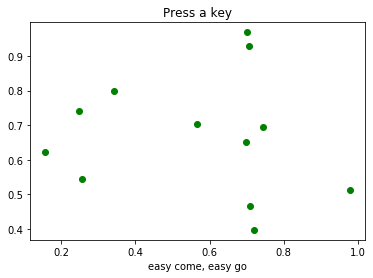

In [9]:
import sys
import numpy as np
import matplotlib.pyplot as plt


def press(event):
    print('press', event.key)
    sys.stdout.flush()
    if event.key == 'x':
        visible = xl.get_visible()
        xl.set_visible(not visible)
        fig.canvas.draw()

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()

fig.canvas.mpl_connect('key_press_event', press)

ax.plot(np.random.rand(12), np.random.rand(12), 'go')
xl = ax.set_xlabel('easy come, easy go')
ax.set_title('Press a key')
plt.show()

---
# working

# Plot graph external window using Qt

In [ ]:
%matplotlib qt

# Read MATLAB gamma.mat

In [30]:
mat_path = r'W:\wataru\Recording_Analysis\Bases_dmPFC-BLA\2017-12-19_vm81a_base\RIG01_171219_140419_gamma.mat'
gamma = hdf5storage.loadmat(mat_path)['gamma']

print(gamma.dtype, gamma.dtype.names)

data = np.squeeze(gamma['data'][0,:,0])
timestamps = np.squeeze(gamma['timestamps'])

print(data.dtype,data.shape,timestamps.dtype,timestamps.shape)

[('timestamps', '<f8', (4500000, 1)), ('data', '<f8', (4500000, 6)), ('amp', '<f8', (4500000, 6)), ('phase', '<f8', (4500000, 6)), ('filterparms', [('passband', '<f8', (1, 2)), ('stopband', '<f8', (0, 0)), ('order', '<f8', (1, 1))], (1,)), ('samplingRate', '<f8', (1, 1))] ('timestamps', 'data', 'amp', 'phase', 'filterparms', 'samplingRate')
float64 (4500000,) float64 (4500000,)


In [8]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from PyQt5 import QtCore
import hdf5storage

d_type = 'gamma'
mat_path = r'gamma1_flat.mat'
wave = hdf5storage.loadmat(mat_path)

wave_data = np.squeeze(wave['data'])[:, 0]
wave_timestamps = np.squeeze(wave['timestamps'])

In [9]:
wave_data.shape

(450000,)

In [10]:
wave_timestamps.shape

(450000,)

# Read MATLAB spectrogram with top level struct (1.2GB)

In [33]:
mat_path = r'W:\wataru\Recording_Analysis\Bases_dmPFC-BLA\2017-12-19_vm81a_base\RIG01_171219_140419_specg1.mat'
spec = hdf5storage.loadmat(mat_path)['specg1']

spec1 = np.squeeze(spec['powspctrm'][0,0,:,:])
timestamps = np.squeeze(spec['time'])
freq = np.squeeze(spec['freq'])

print(spec1.dtype, spec1.shape,timestamps.dtype,timestamps.shape,freq.dtype, freq.shape)

float64 (58, 450001) float64 (450001,) float64 (58,)


# Read MATLAB spectrogram without top level struct (flat format, 4GB)

In [20]:
import numpy as np
import hdf5storage

mat_path = r'W:\wataru\Recording_Analysis\Bases_dmPFC-BLA\2017-12-19_vm81a_base\RIG01_171219_140419_specg_flat.mat'
spec = hdf5storage.loadmat(mat_path)

# list keys of dictionary
print(spec.keys())

spec_data = np.squeeze(spec['powspctrm'][0, :, :])
spec_timestamps = np.squeeze(spec['time'])
spec_freq = np.squeeze(spec['freq'])

print(spec_data.dtype, spec_data.shape,spec_timestamps.dtype,spec_timestamps.shape,spec_freq.dtype, spec_freq.shape)

dict_keys(['cfg', 'dimord', 'freq', 'label', 'powspctrm', 'time'])
float64 (201, 450001) float64 (450001,) float64 (201,)
